## Importing the library

In [97]:
import pandas as pd 
import seaborn as sns
import numpy as np 
from matplotlib import pyplot as plt

## Reading the data 

In [98]:
data = pd.read_csv("scholarship.csv")
data.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


## Copying the data into another var

In [99]:
data_cp1 = data.copy()
data_cp1

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


## Check the shape

In [100]:
data_cp1.shape

(1000, 3)

## Creating the subplot and distplot

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


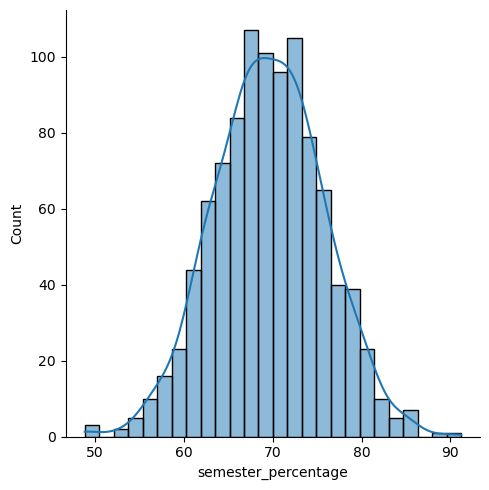

In [116]:
#plt.subplot(2,3,1)
#sns.distplot(data_cp1['semester_percentage'])
#plt.subplot(2,3,2)
#sns.distplot(data_cp1['scholarship_exam_marks'])
#plt.subplot(2,3,3)
#sns.distplot(data_cp1['got_scholarship'])
df_sem_per=pd.DataFrame(data_cp1)
sns.displot(data=df_sem_per["semester_percentage"],kind="hist",kde="True")
#sns.histplot()
plt.tight_layout()

plt.show()

In [117]:
means = df_sem_per["semester_percentage"].mean()
stds = df_sem_per["semester_percentage"].std()
print("Mean:",means,"\nstd:",stds)

Mean: 69.6124 
std: 6.158978751323897


In [118]:
highest_value = means + 3*stds
lowest_value = means - 3*stds

print("Highest:",highest_value,"\nLowest:" ,lowest_value)

Highest: 88.08933625397168 
Lowest: 51.13546374602831


In [104]:
df_sem_per

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


## Trimming the value (Value should be greater than lowest and lower than highest value)

In [119]:
df_sem_per[(df_sem_per['semester_percentage'] > lowest_value) & (df_sem_per['semester_percentage'] < highest_value)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


## Finding the Z-Score, converting data normal distribution to STD distribution

In [126]:
df_sem_per["z-score"] = (df_sem_per['semester_percentage'] - df_sem_per['semester_percentage'].mean()) / df_sem_per['semester_percentage'].std()

In [127]:
df_sem_per

,semester_percentage,scholarship_exam_marks,got_scholarship,z-score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
998,86.2,46,1,2.693239


## Trimming the value to higher and lower 3/-3

In [128]:
df_sem_per[(df_sem_per['z-score']> -3) & (df_sem_per['z-score']< 3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z-score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


## Check the value which is greater than 3 and lower than -3

In [132]:
df_sem_per[(df_sem_per['z-score']< -3)| (df_sem_per['z-score']> 3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z-score
485,51.135464,44,1,-3.314251
995,88.089336,44,1,3.099150
996,88.089336,65,1,3.505062
997,51.135464,34,0,-3.362960
999,51.135464,10,1,-3.346724


## Capping the Data it means (If value is greater than upper limit then the value will change to upper limit, similar way if the value is lower than lower limit then will change to lower limit)

In [133]:
upper_limit = means + 3 * stds
lower_limit = means - 3 * stds
print(upper_limit,lower_limit)

88.08933625397168 51.13546374602831


In [134]:
df_sem_per["semester_percentage"] = np.where(df_sem_per["semester_percentage"] > upper_limit, upper_limit, 
                                 np.where(df_sem_per['semester_percentage'] < lower_limit, lower_limit, df_sem_per["semester_percentage"]))

In [135]:
df_sem_per

,semester_percentage,scholarship_exam_marks,got_scholarship,z-score
0,71.900000,26,1,0.371425
1,74.600000,38,1,0.809810
2,75.400000,40,1,0.939701
3,64.200000,8,1,-0.878782
4,72.300000,17,0,0.436371
...,...,...,...,...
995,88.089336,44,1,3.099150
996,88.089336,65,1,3.505062
997,51.135464,34,0,-3.362960
998,86.200000,46,1,2.693239


In [137]:
df_sem_per[(df_sem_per['z-score']< -3) | (df_sem_per['z-score']> 3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z-score
485,51.135464,44,1,-3.314251
995,88.089336,44,1,3.099150
996,88.089336,65,1,3.505062
997,51.135464,34,0,-3.362960
999,51.135464,10,1,-3.346724


In [138]:
df_sem_per[(df_sem_per['semester_percentage'] < lower_limit) & df_sem_per['semester_percentage']>highest_value]

,semester_percentage,scholarship_exam_marks,got_scholarship,z-score
